In [ ]:
!pip install awscli boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [ ]:
!pip install aws configure

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 40.7 MB/s eta 0:00:00
  Created wheel for aws: filename=aws-0.2.5-py3-none-any.whl size=7435 sha256=1db9cc060374cbf8b03156864b4a4cbb6790e910db9a0847accd877d0ab66a2b
  Stored in directory: /root/.cache/pip/wheels/a0/d0/ac/e8d76c21487489b51cdef392e7d23a4ccb35f82633d164ec0c
  Created wheel for configure: filename=configure-0.5-py3-none-any.whl size=6473 sha256=5f8781b87377b422c75be2a58260bf31999ce4b618ac0c512c6f1aa541c8f753
  Stored in directory: /root/.cache/

In [ ]:
!pip install awscli

In [ ]:
!aws configure

Traceback (most recent call last):
  File "/usr/local/bin/aws", line 5, in <module>
    from aws.main import main
  File "/usr/local/lib/python3.10/dist-packages/aws/main.py", line 23
    print '%(name)s: %(endpoint)s' % {
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?


In [ ]:
import os

# Set AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = 'Key goes here'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'Secret Access Key goes here'
os.environ['AWS_DEFAULT_REGION'] = 'us-east-1'  # e.g., 'us-east-1'


In [ ]:
import boto3

s3 = boto3.client('s3')
response = s3.list_buckets()

print("S3 Buckets:")
for bucket in response['Buckets']:
    print(f" - {bucket['Name']}")


S3 Buckets:
 - abhisagemakermodelsbucket
 - climate-risk-data-abhinav
 - sagemaker-studio-418389467491-c6r9ai7newq
 - sagemaker-us-east-1-418389467491


Dataset Selection and Uploading

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('GlobalLandTemperaturesByCity.csv')  # Replace with your dataset filename

# Overview of the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410211 entries, 0 to 7410210
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 395.7+ MB
None
       AverageTemperature  AverageTemperatureUncertainty
count        7.084556e+06                   7.084556e+06
mean         1.703445e+01                   1.024187e+00
std          1.026443e+01                   1.125164e+00
min         -4.270400e+01                   3.400000e-02
25%          1.076800e+01                   3.380000e-01
50%          1.919500e+01                   5.880000e-01
75%          2.537100e+01         

In [ ]:
bucket_name = 'climate-risk-data-abhinav'  # Replace with your bucket name
file_key = 'GlobalLandTemperaturesByCity.csv'  # Desired file name in S3

with open('GlobalLandTemperaturesByCity.csv', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, file_key)

print(f"File uploaded to S3://{bucket_name}/{file_key}")

File uploaded to S3://climate-risk-data-abhinav/GlobalLandTemperaturesByCity.csv


Checking for Missing Values

In [ ]:
print(data.isnull().sum())


dt                                    0
AverageTemperature               325655
AverageTemperatureUncertainty    325655
City                                  0
Country                               1
Latitude                              1
Longitude                             1
dtype: int64


In [ ]:
data['AverageTemperature'].fillna(data['AverageTemperature'].mean(), inplace=True)
data['AverageTemperatureUncertainty'].fillna(data['AverageTemperatureUncertainty'].mean(), inplace=True)


<ipython-input-11-47df1acf0d07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AverageTemperature'].fillna(data['AverageTemperature'].mean(), inplace=True)
<ipython-input-11-47df1acf0d07>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)


Convert Coordinates to Numbers

In [ ]:
def parse_coordinates(coord):
    value = float(coord[:-1])  # Remove the last character (N/S/E/W)
    if coord[-1] in ['S', 'W']:
        value = -value  # Make it negative for South/West
    return value

data['Latitude'] = data['Latitude'].apply(parse_coordinates)
data['Longitude'] = data['Longitude'].apply(parse_coordinates)


In [ ]:
data['dt'] = pd.to_datetime(data['dt'])


In [ ]:
data['Year'] = data['dt'].dt.year
data['Month'] = data['dt'].dt.month


Clean City and Country Names

In [ ]:
data['City'] = data['City'].str.strip().str.title()
data['Country'] = data['Country'].str.strip().str.title()


Saving and Re-Uploading data set

In [ ]:
data.to_csv('cleaned_climate_data.csv', index=False)


In [ ]:
import boto3

bucket_name = 'climate-risk-data-abhinav'  # Replace with your bucket name
file_key = 'cleaned_climate_data.csv'

# Initialize S3 client
s3 = boto3.client('s3')

# Upload the cleaned file
with open('cleaned_climate_data.csv', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, file_key)

print(f"Cleaned data uploaded to S3://{bucket_name}/{file_key}")


Cleaned data uploaded to S3://climate-risk-data-abhinav/cleaned_climate_data.csv


Analyzing and Visualizing Trends

In [ ]:
import boto3
import pandas as pd

# Initialize S3 client
s3 = boto3.client('s3')
bucket_name = 'climate-risk-data-abhinav'  # Replace with your bucket name
file_key = 'cleaned_climate_data.csv'

# Load dataset
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
data = pd.read_csv(obj['Body'])

# Preview dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410210 entries, 0 to 7410209
Data columns (total 9 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       float64
 6   Longitude                      float64
 7   Year                           int64  
 8   Month                          int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 508.8+ MB
None
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01            6.068000                       1.737000  Århus   
1  1743-12-01           17.034449                       1.024187  Århus   
2  1744-01-01           17.034449                       1.024187  Århus   
3  1744-02-01           17.034449  

In [ ]:
global_temp = data.groupby('Year')['AverageTemperature'].mean().reset_index()
print(global_temp.head())


   Year  AverageTemperature
0  1743           11.008587
1  1744           12.864599
2  1745           11.895699
3  1746           17.034449
4  1747           17.034449


In [ ]:
nyc_temp = data[data['City'] == 'New York']
nyc_yearly_temp = nyc_temp.groupby('Year')['AverageTemperature'].mean().reset_index()
print(nyc_yearly_temp.head())


   Year  AverageTemperature
0  1743           10.149224
1  1744           13.451733
2  1745           11.734466
3  1746           17.034449
4  1747           17.034449


Visualize Trends

In [ ]:
!pip install matplotlib seaborn


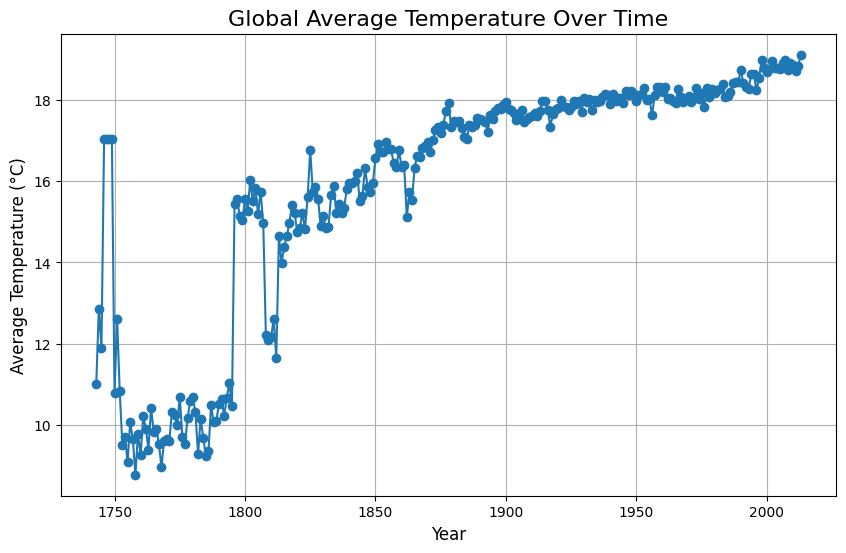

In [ ]:
import matplotlib.pyplot as plt

# Plot global temperature trends
plt.figure(figsize=(10, 6))
plt.plot(global_temp['Year'], global_temp['AverageTemperature'], marker='o')
plt.title('Global Average Temperature Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()


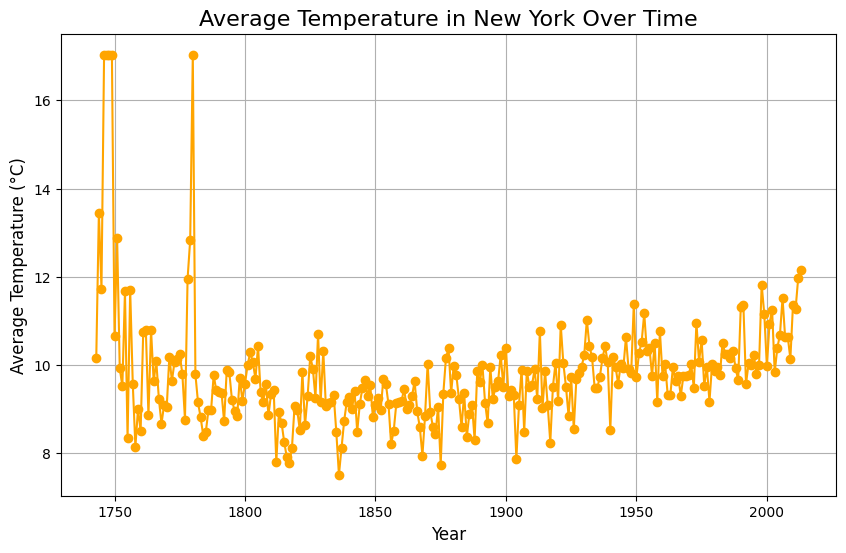

In [ ]:
# Plot NYC temperature trends
plt.figure(figsize=(10, 6))
plt.plot(nyc_yearly_temp['Year'], nyc_yearly_temp['AverageTemperature'], marker='o', color='orange')
plt.title('Average Temperature in New York Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()


Regional Trends

In [ ]:
country_temp = data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()
usa_temp = country_temp[country_temp['Country'] == 'United States']


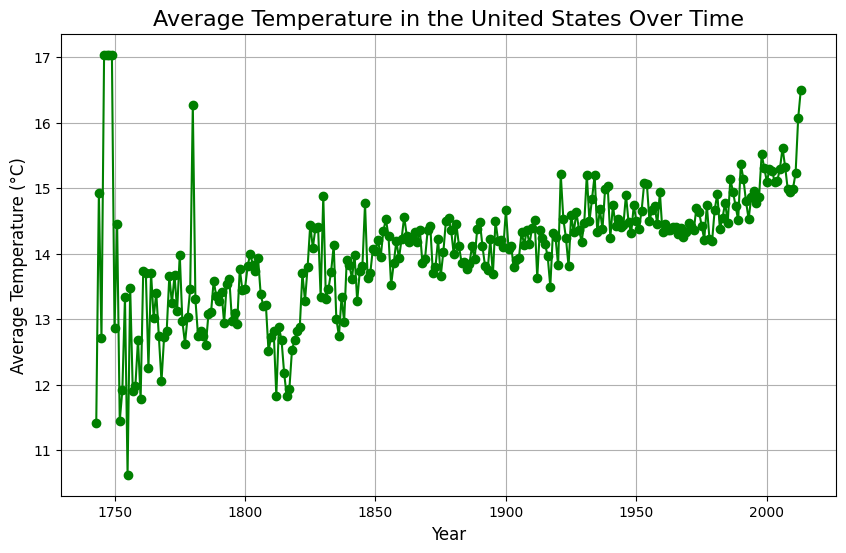

In [ ]:
# Plot USA temperature trends
plt.figure(figsize=(10, 6))
plt.plot(usa_temp['Year'], usa_temp['AverageTemperature'], marker='o', color='green')
plt.title('Average Temperature in the United States Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
plt.savefig('global_temp_trend.png')


<Figure size 640x480 with 0 Axes>

In [ ]:
# Upload the saved plot to S3
with open('global_temp_trend.png', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, 'global_temp_trend.png')

print("Plot uploaded to S3!")


Plot uploaded to S3!


In [ ]:
import boto3
import pandas as pd

# Initialize S3 client
s3 = boto3.client('s3')
bucket_name = 'climate-risk-data-abhinav'  # Replace with your bucket name
file_key = 'cleaned_climate_data.csv'

# Load dataset
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
data = pd.read_csv(obj['Body'])

# Preview dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410210 entries, 0 to 7410209
Data columns (total 9 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       float64
 6   Longitude                      float64
 7   Year                           int64  
 8   Month                          int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 508.8+ MB
None
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01            6.068000                       1.737000  Århus   
1  1743-12-01           17.034449                       1.024187  Århus   
2  1744-01-01           17.034449                       1.024187  Århus   
3  1744-02-01           17.034449  

In [ ]:
data['TemperatureRange'] = data['AverageTemperatureUncertainty'] * 2


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data['Month'].apply(get_season)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
le_country = LabelEncoder()
le_season = LabelEncoder()

data['City'] = le_city.fit_transform(data['City'])
data['Country'] = le_country.fit_transform(data['Country'])
data['Season'] = le_season.fit_transform(data['Season'])


In [ ]:
features = ['Latitude', 'Longitude', 'Year', 'Month', 'Season', 'TemperatureRange']
target = 'AverageTemperature'

X = data[features]
y = data[target]


Split data into test and training data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (5928168, 6)
Testing set size: (1482042, 6)


In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [ ]:
# Upload training data to S3
with open('X_train.csv', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, 'X_train.csv')

with open('y_train.csv', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, 'y_train.csv')

print("Processed data uploaded to S3!")


Processed data uploaded to S3!


In [ ]:
import boto3
import pandas as pd

# Initialize S3 client
s3 = boto3.client('s3')
bucket_name = 'climate-risk-data-abhinav'

# Load training and testing data
obj_train_X = s3.get_object(Bucket=bucket_name, Key='X_train.csv')
obj_train_y = s3.get_object(Bucket=bucket_name, Key='y_train.csv')

# Upload X_test.csv and y_test.csv to S3 if not already present
# The with open block can be added to cell 46 along with uploads for X_train.csv and y_train.csv
with open('X_test.csv', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, 'X_test.csv')

with open('y_test.csv', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, 'y_test.csv')

obj_test_X = s3.get_object(Bucket=bucket_name, Key='X_test.csv')
obj_test_y = s3.get_object(Bucket=bucket_name, Key='y_test.csv')

X_train = pd.read_csv(obj_train_X['Body'])
y_train = pd.read_csv(obj_train_y['Body'])
X_test = pd.read_csv(obj_test_X['Body'])
y_test = pd.read_csv(obj_test_y['Body'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

print("Model training completed.")


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Temperatures', fontsize=16)
plt.xlabel('Actual Temperature (°C)', fontsize=12)
plt.ylabel('Predicted Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(model, 'temperature_model.pkl')
print("Model saved locally.")


In [ ]:
# Upload model to S3
with open('temperature_model.pkl', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, 'temperature_model.pkl')

print("Trained model uploaded to S3.")


In [ ]:
response = s3.list_objects_v2(Bucket=bucket_name)
print("Files in S3 bucket:")
for obj in response['Contents']:
    print(obj['Key'])


In [ ]:
!pip install boto3 sagemaker


In [ ]:
import boto3

# Set AWS Region
boto3.setup_default_session(region_name="us-east-1")  # Replace with your region

# Check AWS Region
session = boto3.Session()
print("AWS Region:", session.region_name)


In [ ]:
# Specify IAM Role ARN
role = "arn:aws:iam::418389467491:role/SageMakerExecutionRole"  # Replace with your IAM role


In [ ]:
# Initialize S3 client
s3 = boto3.client('s3')

# Upload model to S3
bucket_name = 'climate-risk-data-abhinav'  # Replace with your bucket name
model_file_key = 'temperature_model.pkl'

with open('temperature_model.pkl', 'rb') as file:
    s3.upload_fileobj(file, bucket_name, model_file_key)

print(f"Model uploaded to S3://{bucket_name}/{model_file_key}")


In [ ]:
%%writefile predictor.py
import joblib
import json
import os

# Load the model
def model_fn(model_dir):
    return joblib.load(os.path.join(model_dir, "model.pkl"))

# Parse input data
def input_fn(request_body, request_content_type):
    if request_content_type == "application/json":
        return json.loads(request_body)
    raise ValueError(f"Unsupported content type: {request_content_type}")

# Make predictions
def predict_fn(input_data, model):
    return model.predict(input_data).tolist()


In [ ]:
from sagemaker.sklearn.model import SKLearnModel

# S3 path to the model file
model_file = f"s3://{bucket_name}/{model_file_key}"

# Create SageMaker model
sklearn_model = SKLearnModel(
    model_data=model_file,
    role=role,
    entry_point="predictor.py",
    framework_version="0.23-1"
)

# Deploy model as a SageMaker endpoint
predictor = sklearn_model.deploy(
    instance_type="ml.m5.large",  # Use a smaller instance like "ml.t2.medium" if cost is a concern
    initial_instance_count=1,
    endpoint_name="temperature-predictor-endpoint"
)

print("Endpoint deployed successfully.")


In [ ]:
import json
from sagemaker.predictor import Predictor

# Initialize predictor for the endpoint
predictor = Predictor(endpoint_name="temperature-predictor-endpoint")

# Test data (replace with your features)
test_data = {
    "Latitude": [37.77],
    "Longitude": [-122.42],
    "Year": [2023],
    "Month": [12],
    "Season": [2],
    "TemperatureRange": [2.5]
}

# Make a prediction
response = predictor.predict(json.dumps(test_data))
print("Prediction:", response)


In [ ]:
# Delete the endpoint
predictor.delete_endpoint()
print("Endpoint deleted.")


In [ ]:
!pip install flask


In [ ]:
from flask import Flask, request, render_template
import boto3
import json

app = Flask(__name__)

# Initialize SageMaker runtime client
sagemaker_runtime = boto3.client('sagemaker-runtime', region_name='us-east-1')

# Define the SageMaker endpoint name
endpoint_name = 'temperature-predictor-endpoint'  # Replace with your endpoint name

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Get form data
        latitude = float(request.form['latitude'])
        longitude = float(request.form['longitude'])
        year = int(request.form['year'])
        month = int(request.form['month'])
        season = int(request.form['season'])
        temp_range = float(request.form['temp_range'])

        # Prepare payload for SageMaker
        payload = {
            'Latitude': [latitude],
            'Longitude': [longitude],
            'Year': [year],
            'Month': [month],
            'Season': [season],
            'TemperatureRange': [temp_range]
        }

        # Invoke SageMaker endpoint
        response = sagemaker_runtime.invoke_endpoint(
            EndpointName=endpoint_name,
            ContentType='application/json',
            Body=json.dumps(payload)
        )

        # Decode the response
        prediction = json.loads(response['Body'].read().decode())

        return render_template('index.html', prediction=prediction[0])

    return render_template('index.html', prediction=None)

if __name__ == '__main__':
    app.run(port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!python app.py
